In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%config InlineBackend.figure_format = 'svg'

In [36]:
risk = pd.read_csv('risk_cluster.csv')

In [37]:
risk = risk.set_index('ticker')

In [38]:
scale = StandardScaler()

In [39]:
X = scale.fit_transform(risk.values)

In [13]:
model = KMeans(n_clusters=4,n_init=10)

In [14]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
model.inertia_

3820.2415350608435

In [42]:
inertia = []

for num_clusters in range(1,21):
    model = KMeans(n_clusters=num_clusters)
    model.fit(X)
    inertia.append(model.inertia_)

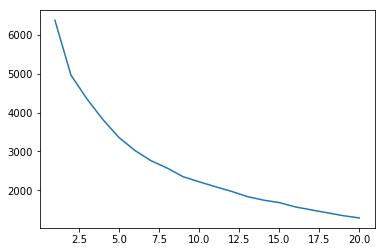

In [43]:
plt.plot(list(range(1,21)), inertia)

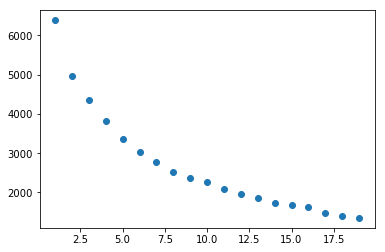

In [24]:
plt.scatter(list(range(1,20)), inertia)

In [62]:
num_clusters = 8
model = KMeans(n_clusters=num_clusters, n_init=10)
model.fit(X)
model.labels_

array([0, 0, 0, 3, 0, 0, 0, 1, 0, 6, 0, 0, 3, 1, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 1, 1, 0, 4, 6, 7, 0, 1, 1, 0, 0, 0, 0, 1, 6, 0, 1, 4, 0, 0,
       0, 0, 3, 3, 0, 1, 1, 7, 1, 3, 0, 1, 3, 3, 0, 0, 1, 6, 0, 3, 0, 0,
       4, 0, 0, 0, 0, 1, 0, 6, 1, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 7, 0, 0, 0, 7, 4,
       7, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 7, 3, 3, 6, 1, 1, 1, 4,
       3, 1, 0, 7, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0, 0, 0, 0, 1, 6, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 0, 0, 1, 7, 0, 1, 6, 7, 1, 1, 5,
       6, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 3, 0,
       1, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 4, 7, 3, 6, 3, 0, 0, 3, 3,
       3, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 3, 0, 4, 3, 0, 1, 1, 1, 1, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 6, 3, 1, 3, 0, 0, 0, 0,
       3, 6, 3, 3, 0, 0, 0, 1, 7, 5, 0, 7, 1, 3, 0, 0, 3, 6, 0, 7, 0, 3,
       1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 3, 1, 1, 0,

In [63]:
risk['cluster'] = model.labels_

In [64]:
risk

,alpha,beta,mean_return,r_squared,stddev,sharpe,treynor,cluster
ticker,,,,,,,,
AAXJ,3.18,1.06,0.54,75.37,14.73,0.39,4.53,0
ACIM,4.35,0.86,0.60,88.27,11.02,0.58,7.00,0
ACWI,4.12,0.87,0.58,89.88,11.05,0.56,6.67,0
ACWV,6.93,0.55,0.75,62.90,8.33,0.99,15.03,3
ACWX,-0.07,1.00,0.26,99.97,12.01,0.20,1.66,0
ADRD,-1.94,0.92,0.09,86.89,11.79,0.02,-0.45,0
ADRE,2.60,1.30,0.54,74.02,18.10,0.32,3.28,0
AFK,-6.64,1.00,-0.29,54.29,16.27,-0.26,-5.44,1
AGG,-0.05,1.00,0.19,99.97,2.77,0.55,1.51,0


In [65]:
risk_return = risk[['stddev', 'mean_return']]

AttributeError: 'str' object has no attribute 'shape'

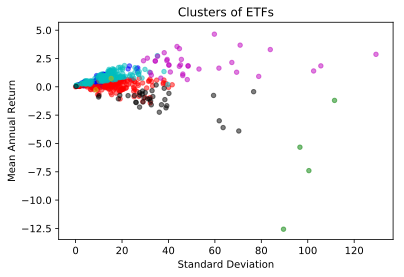

In [79]:
color = 'brgcmykp'
alpha = 0.5
s = 20
for i in range(num_clusters):
    plt.scatter(risk_return.values[model.labels_==i,0], risk_return.values[model.labels_==i,1],c = color[i], alpha = alpha, s=s)
    plt.title('Clusters of ETFs')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Mean Annual Return')

In [70]:
risk[risk['cluster'] == 4].index

Index(['BIB', 'BRZU', 'CURE', 'DRN', 'EDC', 'FAS', 'FINU', 'GOEX', 'INDL',
       'JNUG', 'JPNL', 'KOLD', 'LBJ', 'MIDU', 'NUGT', 'QLD', 'RETL', 'ROM',
       'SCO', 'SOXL', 'SPXL', 'SVXY', 'TECL', 'TMF', 'TNA', 'TQQQ', 'UBR',
       'UDOW', 'UMDD', 'UPRO', 'URTY', 'USD', 'UWM', 'XPP', 'YINN'],
      dtype='object', name='ticker')